In [3]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import os
import sys
sys.path.insert(0, os.path.abspath('../..'))
import utils
np.random.seed(2) 
torch.manual_seed(2)
%load_ext autoreload
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

In [42]:
%autoreload

In [43]:
lcs = utils.get_data(folder='../../datasets/ZTF_g')

validated 3408 files out of 3408 for band='g'
1687.1367
created union_tp attribute of length 3500
dataset created w/ shape (2559, 1, 1974, 3)
train size: 2303, valid size: 231, test size: 256


In [37]:
def preview_lcs(lcs, indexes=[1043,1188,1863,2131], figsize=(15,15), fs=30):
    dims = lcs.dataset.shape[1]
    fig, ax = plt.subplots(len(indexes), dims, figsize=figsize, squeeze=False)
    fig.tight_layout(pad=5.0)
    c = 0
    for i in indexes:
        obj_name = lcs.valid_files_df.index.values[i]
        ax[c][0].set_title(obj_name,fontsize=fs)
        for band in range(dims):
            t = lcs.dataset[i,band,:,0]
            y = lcs.dataset[i,band,:,1]
            yerr = lcs.dataset[i,band,:,2]
            pts = y.nonzero()[0]
            ax[c][band].errorbar(t[pts],y[pts], yerr=yerr[pts], c='blue', fmt='.', markersize=4, ecolor='red', elinewidth=1, capsize=2)
        c+= 1
    lines_labels = ax[0][0].get_legend_handles_labels()
    lines,labels = lines_labels[0], lines_labels[1]
    fig.legend(lines, labels, loc='upper left')
    [ax[c-1][index].set_xlabel(lcs.bands[index],fontsize=fs+10) for index in range(len(lcs.bands))]
    

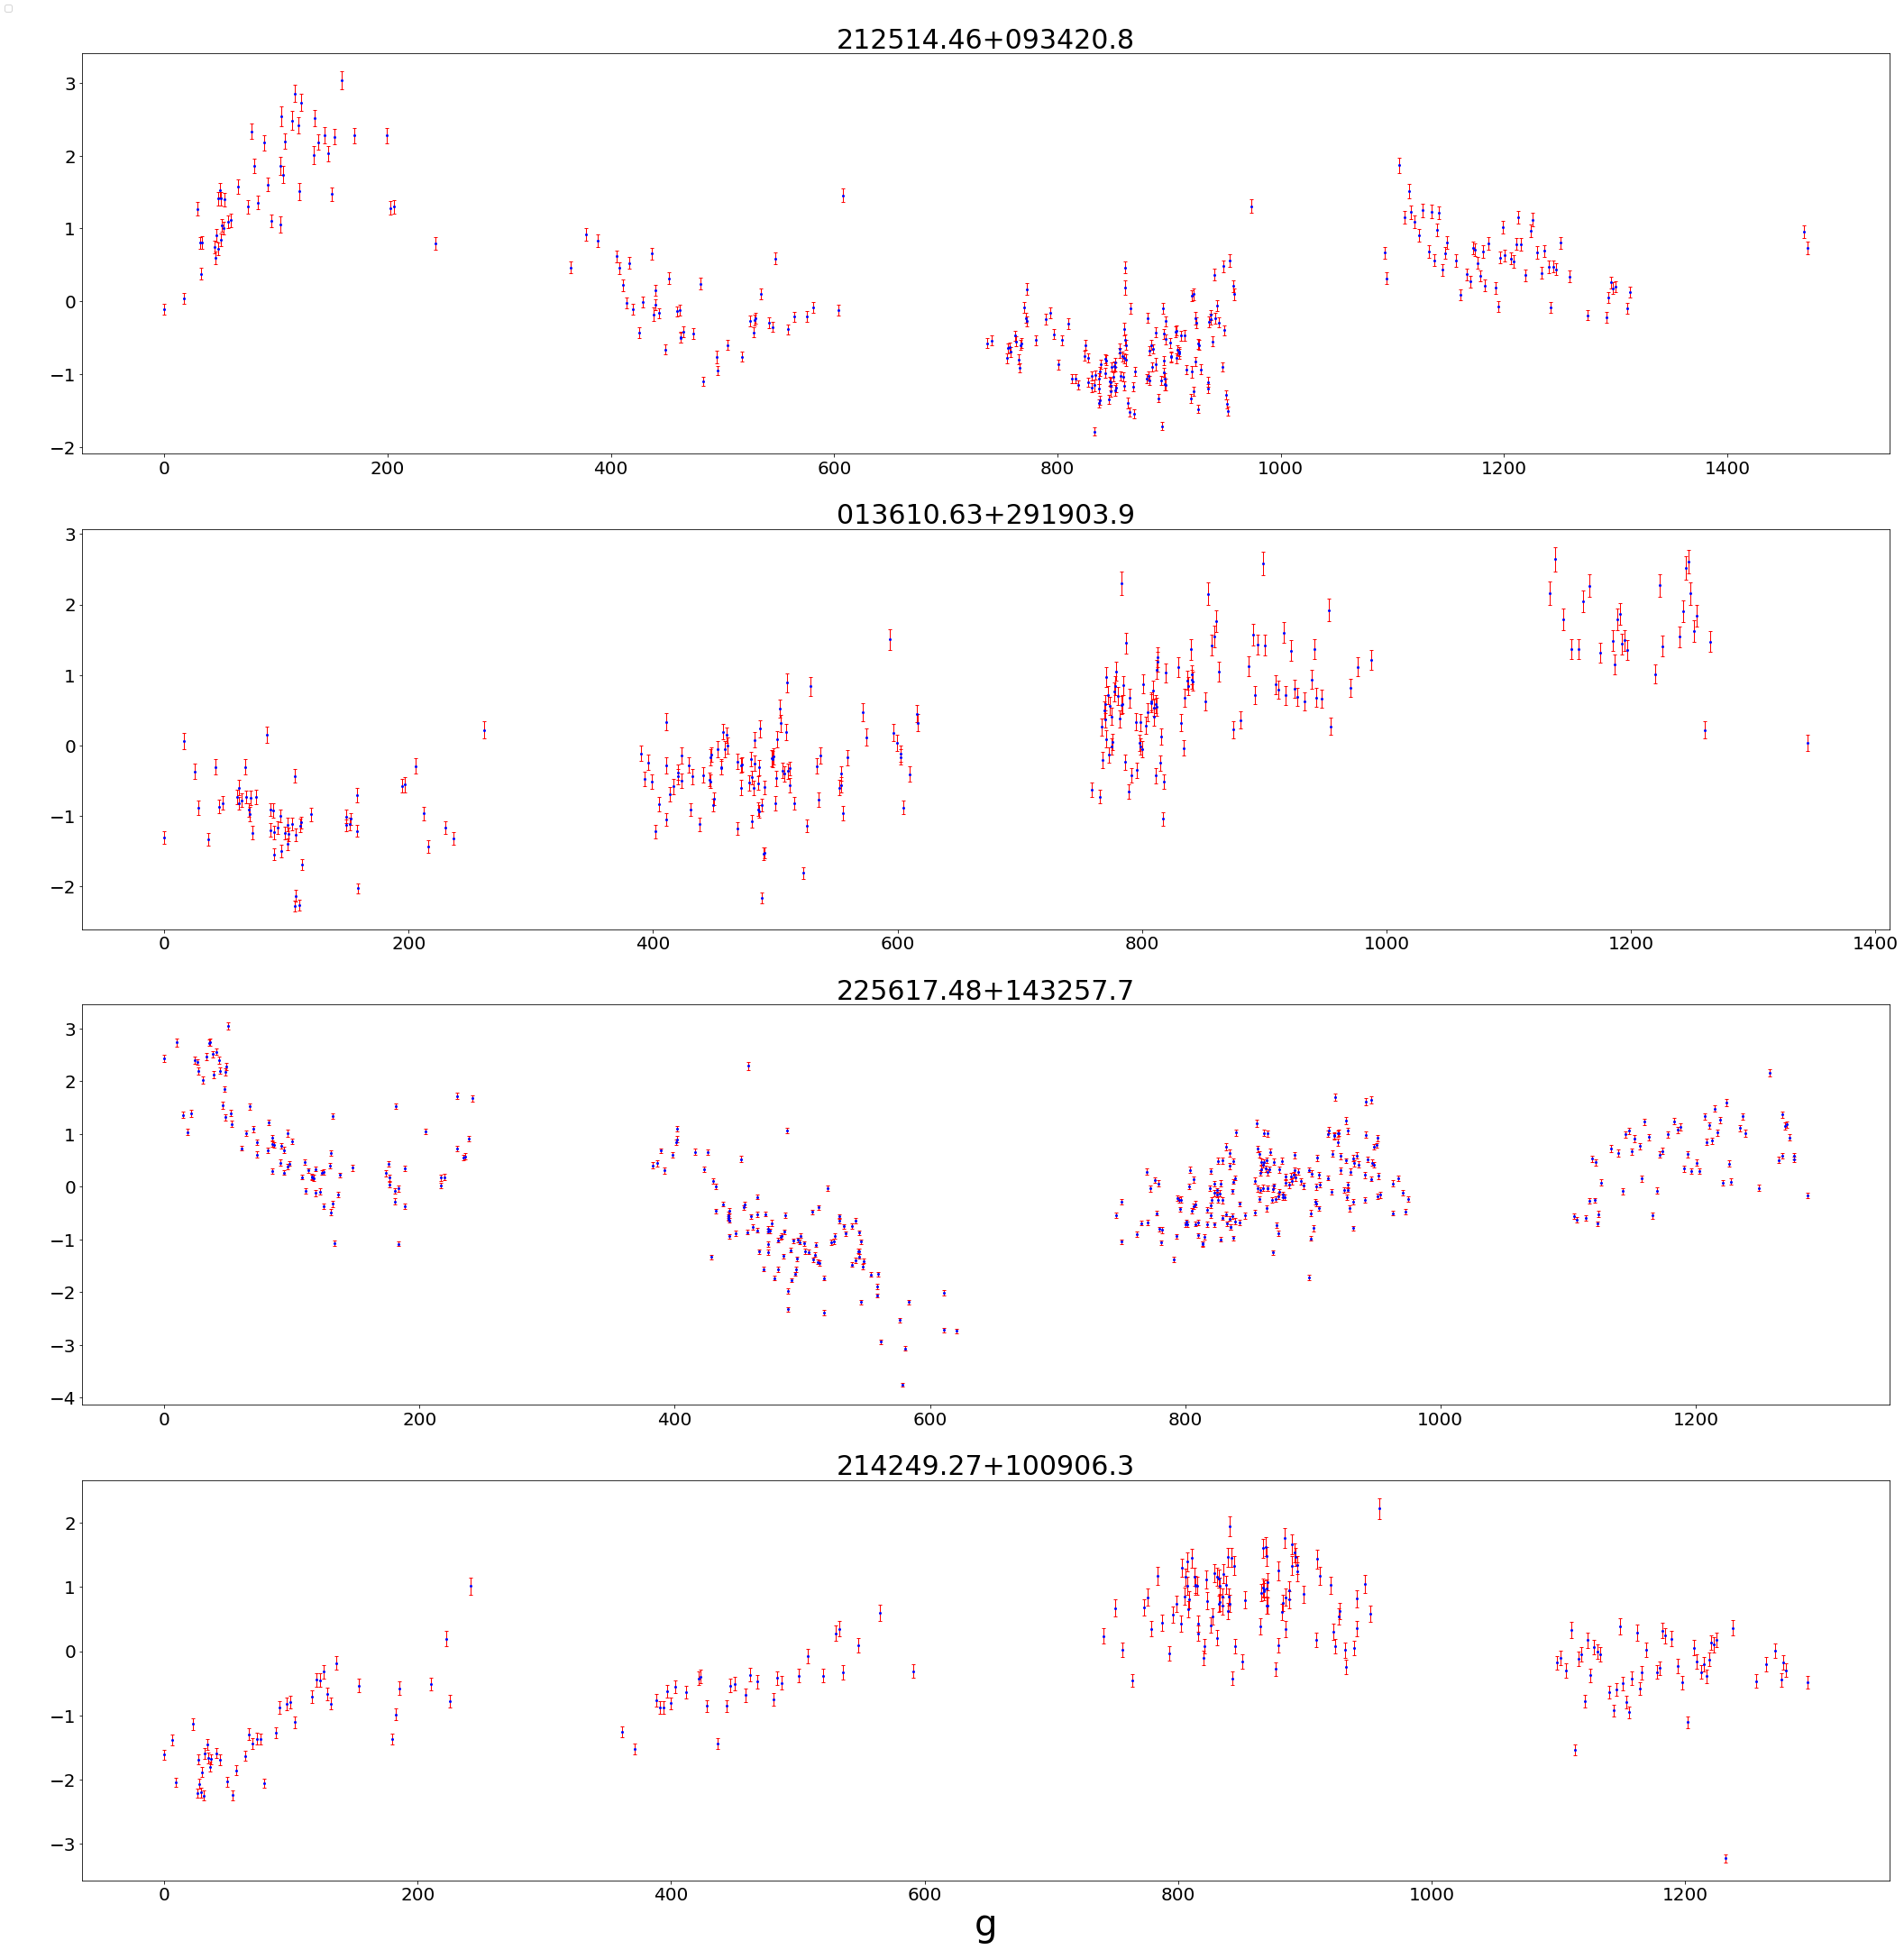

In [39]:
preview_lcs(lcs, figsize=(30,30))
plt.savefig('../img/light_curve_prevs')

In [52]:
pc1bin10 = [557]

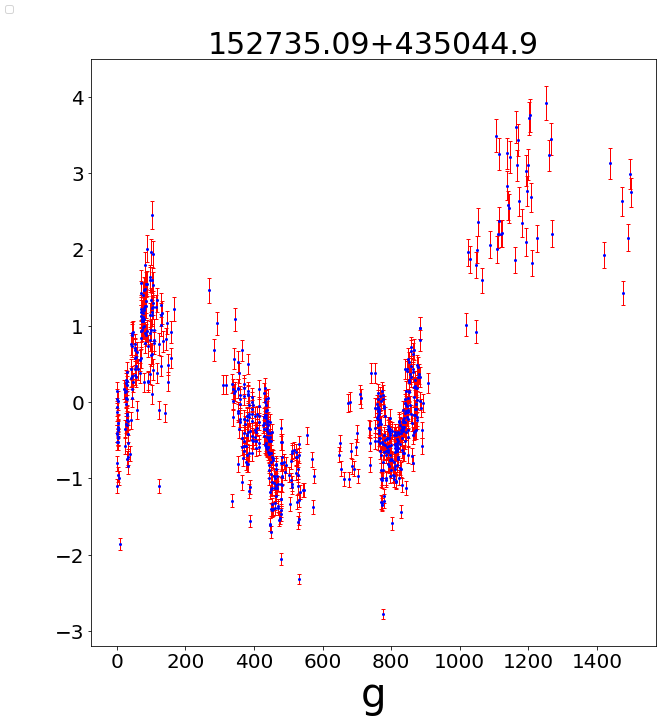

In [53]:
preview_lcs(lcs, indexes=pc1bin10[:4], figsize=(10,10))